# Časovna kompleksnost

Pri razvoju algoritmov in novih rešitev pogosto srečamo več možnih rešitev istega problema, pri čemer želimo postaviti neke kriterije za izbiro optimalne rešitve pri podanih zahtevah. Pogosto vključimo kriterij vpliva izbrane rešitve na naš sistem v smislu:
* koliko spomina zahteva algoritem za delovanje?
* koliko računskih operacij potrebuje za rešitev,
* koliko časa traja izvajanje (v sekundah ali ciklih procesorja). 

Običajno nobena rešitev ali algoritem ne deluje optimalno po vseh teh kriterijih, saj bo hitrejši algoritem navadno potreboval več sistemskih resursov ali ciklov procesorja. 

Pri nalogi se bomo osredotočili na merjenje časa, potrebnega za izvajanje različnih algoritmov sortiranja podatkov. 


## Naloga

Testiramo in primerjamo delovanje različnih algoritmov sortiranja števil od najmanjšega do največjega. Pri tem imamo več scenarijev, glede na vhodne podatke:
* **optimalni**, v tem primeru so števila že urejena v želenem vrstnem redu
* **najslabši**, podatki so urejeni v obratnem vrstnem redu kot želimo
* **normalni**, podatki so urejeni naključno.



In [7]:
import timeit as t
import numpy as np
import matplotlib.pyplot as plt
#### %matplotlib notebook
%matplotlib inline

# Vrne set podatkov
def createSet(type = None, size = 10):
    if type == 1:  #return numbers sorted in ascening order -> best case
        return np.linspace(0,1,size).tolist(); 
    elif type == 2: #return numbers in descending order -> wost case
        return np.linspace(1,0,size).tolist();
    else: #return a random assortment of numbers
        return np.absolute(np.random.randn(size)).tolist();

Testiraj in preveri, kakšne podatke vrača funkcija, glede na parameter (brez, 1, 2).

In [8]:
print(createSet())


[0.4985591946915055, 1.5675767079200065, 0.8762904693217457, 0.5452439015631404, 0.6861267296839509, 0.583223711332602, 1.649202908042954, 0.5575431750719401, 0.5060964742164065, 0.21082809196550287]



## Merjenje
Za pravilno meritev časa izvajanja bomo uporabljali funkcijo `timeit()`, namenjeno testiranju hitrosti manjših koščkov kode. Uporablja se na naslednji način, primer:
`t.timeit('quicksort(data)','from __main__ import data,quicksort', number = num)`

Prvi niz je ukaz, ki ga merimo, nato drugi niz definira importe oziroma knjižnice, nato pa še, kolikokrat želimo izvesti ta ukaz (večkrat je bolj zanesljiva meritev časa). 


## Algoritmi
Testirali bomo tri algoritme

### Insertion sort
Zelo osnovni algoritem sortiranja. Deluje s primerjavami parov števil (sosedov), in zamenja njihov vrstni red, če je prvi večji od drugega. Enostavna implementacija (dve for zanki).
https://en.wikipedia.org/wiki/Insertion_sort


In [9]:
def insertionSort(array):
    for j in range(1, len(array)):
        key = array[j]
        i = j - 1
        while i >= 0 and array[i] > key:
            array[i + 1] = array[i]
            i = i - 1
        array[i + 1] = key
    return array

### Quicksort

Temelji na principu divide and conquer, kar pomeni, da postopno deli podatke v manjše in manjše skupine, dokler niso urejeni. Izbere naključni element (pivot), ter nato uredi vse ostale podatke v dve skupini, manjše in večje od tega elementa. To urejanje ponavlja rekurzivno, dokler skupina ne vsebuje samo enega elementa.  

https://en.wikipedia.org/wiki/Quicksort

In [10]:
def quicksort(arr):
    """ Quicksort a list

    :type arr: list
    :param arr: List to sort
    :returns: list -- Sorted list
    """
    if len(arr) <= 1:
        return arr
    else:
        return quicksort([x for x in arr[1:] if x<arr[0]]) + [arr[0]] + quicksort([x for x in arr[1:] if x>=arr[0]])

### Bucket sort
Ta strategija najprej razdeli vhodne podatke v serijo "veder", nato pa te manjše skupine podatkov uredi s pomočjo drugega algoritma za sortiranje. Na koncu združimo vse skupine nazaj v eno urejeno množico. Potrebuje zunanji algoritem sortiranja, v našem primeru insertion sort. 

https://en.wikipedia.org/wiki/Bucket_sort

In [11]:
def bucketsort( A ):
  # get hash codes
  code = hashing( A )
  buckets = [list() for _ in range( code[1] )]
  # distribute data into buckets: O(n)
  for i in A:
    x = re_hashing( i, code )
    buck = buckets[x]
    buck.append( i )
 
  # Sort each bucket: O(n).
  # I mentioned above that the worst case for bucket sort is counting
  # sort. That's because in the worst case, bucket sort may end up
  # with one bucket per key. In such case, sorting each bucket would
  # take 1^2 = O(1). Even after allowing for some probabilistic
  # variance, to sort each bucket would still take 2-1/n, which is
  # still a constant. Hence, sorting all the buckets takes O(n).
 
  for bucket in buckets:
    bucket = insertionSort( bucket )
 
  ndx = 0
  # merge the buckets: O(n)
  for b in range( len( buckets ) ):
    for v in buckets[b]:
      A[ndx] = v
      ndx += 1
      
  return A
 
import math
 
def hashing( A ):
  m = A[0]
  for i in range( 1, len( A ) ):
    if ( m < A[i] ):
      m = A[i]
  result = [m, int( math.sqrt( len( A ) ) )]
  return result
 
 
def re_hashing( i, code ):
  return int( i / code[0] * ( code[1] - 1 ) )



In [12]:
# Setup styles for plotting

style_list = ['default', 'classic'] + sorted(
        style for style in plt.style.available if style != 'classic')
plt.style.use(style_list[4])

### Evaluacija posameznega algoritma

Prvi primer je evaluacija enega algoritma, pri čemer povečujemo velikost podatkovnega seta, in vsakič shranjujemo rezultat oziroma čas izvajanja. Nato izrišemo čase izvajanja. 



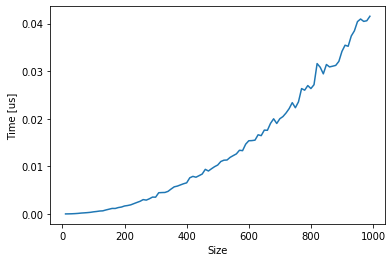

In [20]:
size = np.array([]); #this array will store the current dataset size
t_insertion = np.array([]); #store processing time here
num = 1 #evaluation repetition (keep at 1 for now)

for x in range(10,1000,10): #sort from 10 to 500 items
    data = createSet(type = None, size = x)
    size = np.append(size, x);
    t_insertion = np.append(t_insertion, t.timeit('insertionSort(data)','from __main__ import data, insertionSort', number = num));
plt.figure()

plt.plot(size,t_insertion);
plt.xlabel('Size');
plt.ylabel('Time [us]');
plt.show();  

### Naloga 1:
Testiraj algoritem za različne scenarije urejenosti tipov vhodnih podatkov in komentiraj rezultate.


### Primerjava različnih algoritmov na istih podatkih 

Naslednja koda zažene tri algoritme in jih evalvira na istem setu podatkov.

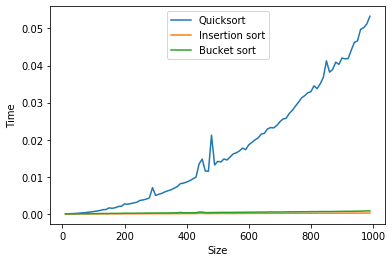

In [25]:
size = np.array([]); #dataset size storage
t_bucket = np.array([]); #bucket algorithm processing time
t_insertion = np.array([]); #insertion algorithm processing time
t_quick = np.array([]); #quicksort algorithm processing time
num = 1 #evaluation repetition (keep at 1 for now)

for x in range(10,1000,10):
    data = createSet(type =1, size = x) #None for random, 1 for best, 2 for worst
    size = np.append(size, x);
    t_quick = np.append(t_quick, t.timeit('quicksort(data)',"from __main__ import data,quicksort", number = num));
    t_insertion = np.append(t_insertion, t.timeit('insertionSort(data)','from __main__ import data, insertionSort', number = num));
    t_bucket = np.append(t_bucket, t.timeit('bucketsort(data)','from __main__ import data,bucketsort', number = num));

plt.figure()   
plt.plot(size,t_quick,size,t_insertion,size,t_bucket);
plt.xlabel('Size');
plt.ylabel('Time');
plt.legend(('Quicksort','Insertion sort','Bucket sort'),loc='upper center');
plt.show();  

### Naloga 2: 
Izvedi simulacije s tremi zgornjimi algoritmi, na različno urejenenih vhodnih podatkih. Primerjaj hitrost algoritmov pri različno urejenenih vhodnih podatkih. Primerjavo hitrosti lahko izračunaš kot faktor hitrosti dveh algoritmov pri sortiranju 1000 števil (npr. algoritem A je 100x počasnejši od B pri 1000 naključnih podatkih). 

### Naloga 3:
Napiši kodo simulacije, s katero bomo primerjali en algoritem na treh različno urejenih vhodnih podatkih, rezultate (čase) izriši v en graf. Izdelaj grafe za vse tri algoritme, in komentiraj rezultate.

In [24]:
# Simulacija 3



### Dodatne naloge

(bonus) V primerjavo algoritmov vključi še mergeSort algoritem, ter komentiraj njegovo učinkovitost v primerjavi z ostalimi. 

(bonus) Izdelaj dodatni sortirni algoritem in ga primerjaj z ostalimi.  (Primeri so tukaj: http://danishmujeeb.com/blog/2014/01/basic-sorting-algorithms-implemented-in-python)

(bonus) V Bucket algoritmu lahko uporabimo tudi druge sortirne algoritme, izvedi simulacijo in primerjaj čas izvajanja. 


In [9]:
def mergeSort(A):
    mergeSort2(A,0,len(A)-1)

def mergeSort2(A,prvi,zadnji):
    if prvi<zadnji:
        srednji= (prvi+zadnji)//2
        mergeSort2(A,prvi,srednji)
        mergeSort2(A,srednji+1,zadnji)
        merge(A,prvi,srednji,zadnji)
    return A

def merge(A,prvi,srednji,zadnji):
    import sys
    L=A[prvi:srednji+1]
    R=A[srednji+1:zadnji+1]
    L.append(sys.maxsize)
    R.append(sys.maxsize)
    i=j=0

    for k in range (prvi, zadnji+1):
        if L[i]<=R[j]:
            A[k]=L[i]
            i+=1
        else:
            A[k]=R[j]
            j+=1